# TAREFA DATASET KAGGLE


Para esta fase, o objetivo é alcançar o melhor resultado possível com o dataset da competição fornecido pelos docentes na previsão do nível de incidentes rodoviários, numa determinada hora, na cidade de Guimarães.

# TODO:

* Corrigir Redes Neuronais
* Corrigir Blending (vai na versão final?)
* Corrigir SVM
* Colocar notebook mais "limpo"

### **1.** Importar as bibliotecas essenciais do Python para a elaboração desta tarefa

In [38]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

### **2.** Carregar o dataset para um dataframe da biblioteca Pandas

In [39]:
df = pd.read_csv('docs/training_data.csv', encoding="utf-8", skipinitialspace=True)
df_teste = pd.read_csv('docs/test_data.csv', encoding="utf-8", skipinitialspace=True)

### **3.** Obtenção de informação acerca do dataset

* **tipos de dados das features**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


* **conteúdo do dataset**

In [41]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


* **estatística**

In [42]:
df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Distribuição da feature target "incidents"

<AxesSubplot:>

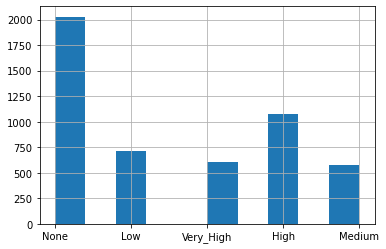

In [43]:
df["incidents"].hist()

Análise dos valores únicos no dataset

In [44]:
for c in df:
    print(f"{c}: {df[c].unique()}")
    print(f"Quantidade: {df[c].nunique()}")
    print("---------------------------------------")

city_name: ['Guimaraes']
Quantidade: 1
---------------------------------------
magnitude_of_delay: ['UNDEFINED' 'MAJOR' 'MODERATE']
Quantidade: 3
---------------------------------------
delay_in_seconds: [   0  385   69 ...  684 8360  896]
Quantidade: 1186
---------------------------------------
affected_roads: [',' 'N101,' 'N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,' 'N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N101,'
 'N101,N101,N206,N105,N309,N309,N101,N101,IC5,N101,N101,N105,N101,N206,N101,N101,N101,IC5,N101,N101,N105,N101,N101,N105,N309,N101,N101,N101,N101,IC5,N101,N105'
 'N101,N101,N101,N101,N105,N101,N101' 'N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,' nan 'N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N206,N105,N101,N101,N105,N105,N101,N101,N101,N101,R206,N101,N101,N105'
 'N101,N101,N206,R206,N206,N101,N105,N206,N309,N101,N101,N101,N101,N101,N105,N206

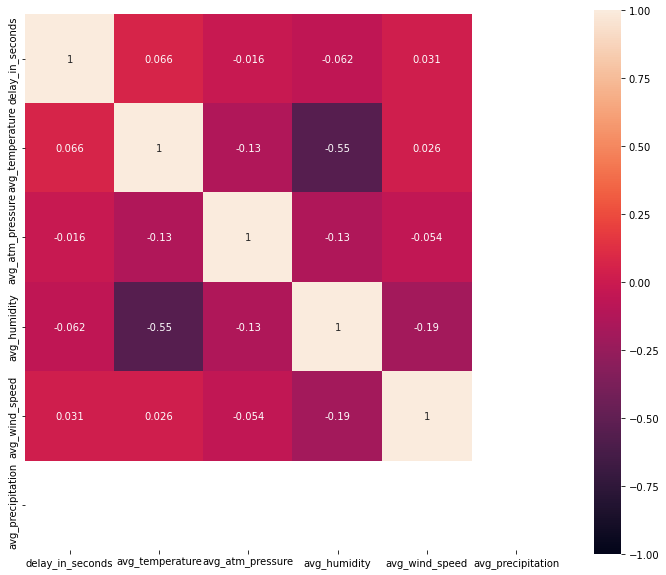

In [45]:
#Correlação entre features
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square = True, annot=True)
plt.draw()

### **4.** Preparação dos dados

In [46]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [47]:
df.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

**Remoção da feature "avg_humidity"**

In [48]:
#forte correlação com avg_temperature
df = df.drop('avg_humidity', axis=1)
df_teste = df_teste.drop('avg_humidity', axis=1)

**Remoção da feature "avg_precipitation"**

In [49]:
#Possui informação incompleta
df = df.drop('avg_precipitation', axis=1)
df_teste = df_teste.drop('avg_precipitation', axis=1)

**Transformação da coluna *record_date* nas colunas ano, mês, dia, hora e minuto**

In [50]:
df['record_date'] = pd.to_datetime(df['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert df['record_date'].isnull().sum() == 0,'missing record date'

df['record_date_year'] = df['record_date'].dt.year
df['record_date_month'] = df['record_date'].dt.month
df['record_date_day'] = df['record_date'].dt.day
df['record_date_hour'] = df['record_date'].dt.hour
df['record_date_minute'] = df['record_date'].dt.minute
df = df.drop('record_date', axis=1)

df.head()


df_teste['record_date'] = pd.to_datetime(df_teste['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert df_teste['record_date'].isnull().sum() == 0,'missing record date'

df_teste['record_date_year'] = df_teste['record_date'].dt.year
df_teste['record_date_month'] = df_teste['record_date'].dt.month
df_teste['record_date_day'] = df_teste['record_date'].dt.day
df_teste['record_date_hour'] = df_teste['record_date'].dt.hour
df_teste['record_date_minute'] = df_teste['record_date'].dt.minute
df_teste = df_teste.drop('record_date', axis=1)

df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,Guimaraes,UNDEFINED,0,",",DARK,12.0,1013.0,1.0,Sem Chuva,None,2021,3,15,23,0
1,Guimaraes,UNDEFINED,385,"N101,",DARK,12.0,1007.0,1.0,Sem Chuva,None,2021,12,25,18,0
2,Guimaraes,UNDEFINED,69,",",LIGHT,14.0,1025.0,0.0,Sem Chuva,Low,2021,3,12,15,0
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",LIGHT,15.0,1028.0,1.0,Sem Chuva,Very_High,2021,9,29,9,0
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",LIGHT,27.0,1020.0,1.0,Sem Chuva,High,2021,6,13,11,0


**Remoção das features "city_name", "record_date_year" e "record_date_minute"**

In [51]:
#como apenas existe um valor para "city_name", esta coluna pode ser removida
df = df.drop('city_name', axis=1)
df_teste = df_teste.drop('city_name', axis=1)

#o mesmo se aplica para o ano e minuto
df = df.drop('record_date_year', axis=1)
df = df.drop('record_date_minute', axis=1)

df_teste = df_teste.drop('record_date_year', axis=1)
df_teste = df_teste.drop('record_date_minute', axis=1)

**Remoção da feature "magnitude_of_delay"**

In [52]:
df = df.drop('magnitude_of_delay', axis=1)
df_teste = df_teste.drop('magnitude_of_delay', axis=1)

**Tratamento da feature "affected_roads"**

In [53]:
df['affected_roads'].unique()

array([',', 'N101,',
       'N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101',
       'N101,N101,N101,N101,N101,',
       'N101,N101,N101,N101,N101,N101,N101,N101',
       'N101,N101,N101,N101,N101',
       'N101,N101,N101,N101,N101,N101,N101,N101,N101,',
       'N101,N101,N206,N105,N309,N309,N101,N101,IC5,N101,N101,N105,N101,N206,N101,N101,N101,IC5,N101,N101,N105,N101,N101,N105,N309,N101,N101,N101,N101,IC5,N101,N105',
       'N101,N101,N101,N101,N105,N101,N101', 'N101,N101,N101',
       'N101,N101,N101,N101,N101,N101,N101,N101,', nan, 'N101,N101',
       'N101,N101,N101,N101,N101,N101,N101,N101,N206,N105,N101,N101,N105,N105,N101,N101,N101,N101,R206,N101,N101,N105',
       'N101,N101,N206,R206,N206,N101,N105,N206,N309,N101,N101,N101,N101,N101,N105,N206,N101,N101,N101,N101,N101,N206,R206,N101,N101,N101,N206,R206,N105,N101,N101,N101,N105,N105,N101,N101',
       'N101,N101,N101,N105,N101,N101',
       'N101,N101,N101,N101,N101,N105,N101,',
       'N101,N105,N101,N101,N101,N105,N101

* Tratamento dos missing values

In [54]:
df['affected_roads'].fillna(',',inplace=True)
df_teste['affected_roads'].fillna(',',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delay_in_seconds   5000 non-null   int64  
 1   affected_roads     5000 non-null   object 
 2   luminosity         5000 non-null   object 
 3   avg_temperature    5000 non-null   float64
 4   avg_atm_pressure   5000 non-null   float64
 5   avg_wind_speed     5000 non-null   float64
 6   avg_rain           5000 non-null   object 
 7   incidents          5000 non-null   object 
 8   record_date_month  5000 non-null   int64  
 9   record_date_day    5000 non-null   int64  
 10  record_date_hour   5000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 429.8+ KB


* Separação das ruas e remoção de ruas repetidas

In [55]:
import re

regex_exp = r'([a-zA-Z]+\d+(\s*-\s*[a-zA-Z]*\d+)?)'
pattern = re.compile(regex_exp)

affected_roads = {}

for row in df['affected_roads']:
    roads = [v[0] for v in pattern.findall(row)]
    
    for road in roads:
        affected_roads[road] = []

for row in df['affected_roads']:
    roads = [v[0] for v in pattern.findall(row)]

    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
df = df.drop('affected_roads',axis=1)

for column in affected_roads:
    df[column] = affected_roads[column]
    
#######################################################################
affected_roads = {}

for row in df_teste['affected_roads']:
    roads = pattern.findall(row) 
    #roads = list(dict.fromkeys(row.split(',')))
    for road in roads:
        affected_roads[road] = []

for row in df_teste['affected_roads']:
    roads = pattern.findall(row) 
    #roads = list(dict.fromkeys(row.split(',')))
    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
df_teste = df_teste.drop('affected_roads',axis=1)

for column in affected_roads:
    df_teste[column] = affected_roads[column]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delay_in_seconds   5000 non-null   int64  
 1   luminosity         5000 non-null   object 
 2   avg_temperature    5000 non-null   float64
 3   avg_atm_pressure   5000 non-null   float64
 4   avg_wind_speed     5000 non-null   float64
 5   avg_rain           5000 non-null   object 
 6   incidents          5000 non-null   object 
 7   record_date_month  5000 non-null   int64  
 8   record_date_day    5000 non-null   int64  
 9   record_date_hour   5000 non-null   int64  
 10  N101               5000 non-null   int64  
 11  R206               5000 non-null   int64  
 12  N105               5000 non-null   int64  
 13  N206               5000 non-null   int64  
 14  N309               5000 non-null   int64  
 15  IC5                5000 non-null   int64  
 16  N310               5000 

**Transformação da feature "luminosity" em valores numéricos**

In [56]:
df['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [57]:
replace_map = {'luminosity': {'LOW_LIGHT':0 ,'LIGHT': 1, 'DARK': 2}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,2,12.0,1013.0,1.0,Sem Chuva,None,3,15,23,0,0,0,0,0,0,0,0,0,0
1,385,2,12.0,1007.0,1.0,Sem Chuva,None,12,25,18,1,0,0,0,0,0,0,0,0,0
2,69,1,14.0,1025.0,0.0,Sem Chuva,Low,3,12,15,0,0,0,0,0,0,0,0,0,0
3,2297,1,15.0,1028.0,1.0,Sem Chuva,Very_High,9,29,9,1,1,1,0,0,0,0,0,0,0
4,0,1,27.0,1020.0,1.0,Sem Chuva,High,6,13,11,1,0,0,0,0,0,0,0,0,0


**Tranformação da feature "avg_rain" em valores numéricos**

In [58]:
df['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [59]:
replace_map = {'avg_rain': {'Sem Chuva':0 ,'chuva fraca': 1, 'chuva moderada': 2,'chuva forte' : 3}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,2,12.0,1013.0,1.0,0,None,3,15,23,0,0,0,0,0,0,0,0,0,0
1,385,2,12.0,1007.0,1.0,0,None,12,25,18,1,0,0,0,0,0,0,0,0,0
2,69,1,14.0,1025.0,0.0,0,Low,3,12,15,0,0,0,0,0,0,0,0,0,0
3,2297,1,15.0,1028.0,1.0,0,Very_High,9,29,9,1,1,1,0,0,0,0,0,0,0
4,0,1,27.0,1020.0,1.0,0,High,6,13,11,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "incidents" em valores numéricos**

In [60]:
df['incidents'].unique()

array(['None', 'Low', 'Very_High', 'High', 'Medium'], dtype=object)

In [61]:
replace_map = {'incidents': {'None':0 ,'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,2,12.0,1013.0,1.0,0,0,3,15,23,0,0,0,0,0,0,0,0,0,0
1,385,2,12.0,1007.0,1.0,0,0,12,25,18,1,0,0,0,0,0,0,0,0,0
2,69,1,14.0,1025.0,0.0,0,1,3,12,15,0,0,0,0,0,0,0,0,0,0
3,2297,1,15.0,1028.0,1.0,0,4,9,29,9,1,1,1,0,0,0,0,0,0,0
4,0,1,27.0,1020.0,1.0,0,3,6,13,11,1,0,0,0,0,0,0,0,0,0


#### Adição de feature "dayOfWeek" e respetiva transformação em valores numéricos

In [62]:
import datetime

def getDayofWeek(df):
    mes = int (df['record_date_month'])
    dia = int (df['record_date_day'])
    intDay = datetime.date(year=2021, month=mes, day=dia).weekday()
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days[intDay]

df['dayOfWeek'] = df.apply(getDayofWeek, axis=1)

df.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,dayOfWeek
0,0,2,12.0,1013.0,1.0,0,0,3,15,23,0,0,0,0,0,0,0,0,0,0,Monday
1,385,2,12.0,1007.0,1.0,0,0,12,25,18,1,0,0,0,0,0,0,0,0,0,Saturday
2,69,1,14.0,1025.0,0.0,0,1,3,12,15,0,0,0,0,0,0,0,0,0,0,Friday
3,2297,1,15.0,1028.0,1.0,0,4,9,29,9,1,1,1,0,0,0,0,0,0,0,Wednesday
4,0,1,27.0,1020.0,1.0,0,3,6,13,11,1,0,0,0,0,0,0,0,0,0,Sunday


In [63]:
replace_map = {'dayOfWeek': {'Monday':1 ,'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,dayOfWeek
0,0,2,12.0,1013.0,1.0,0,0,3,15,23,0,0,0,0,0,0,0,0,0,0,1
1,385,2,12.0,1007.0,1.0,0,0,12,25,18,1,0,0,0,0,0,0,0,0,0,6
2,69,1,14.0,1025.0,0.0,0,1,3,12,15,0,0,0,0,0,0,0,0,0,0,5
3,2297,1,15.0,1028.0,1.0,0,4,9,29,9,1,1,1,0,0,0,0,0,0,0,3
4,0,1,27.0,1020.0,1.0,0,3,6,13,11,1,0,0,0,0,0,0,0,0,0,7


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delay_in_seconds   5000 non-null   int64  
 1   luminosity         5000 non-null   int64  
 2   avg_temperature    5000 non-null   float64
 3   avg_atm_pressure   5000 non-null   float64
 4   avg_wind_speed     5000 non-null   float64
 5   avg_rain           5000 non-null   int64  
 6   incidents          5000 non-null   int64  
 7   record_date_month  5000 non-null   int64  
 8   record_date_day    5000 non-null   int64  
 9   record_date_hour   5000 non-null   int64  
 10  N101               5000 non-null   int64  
 11  R206               5000 non-null   int64  
 12  N105               5000 non-null   int64  
 13  N206               5000 non-null   int64  
 14  N309               5000 non-null   int64  
 15  IC5                5000 non-null   int64  
 16  N310               5000 

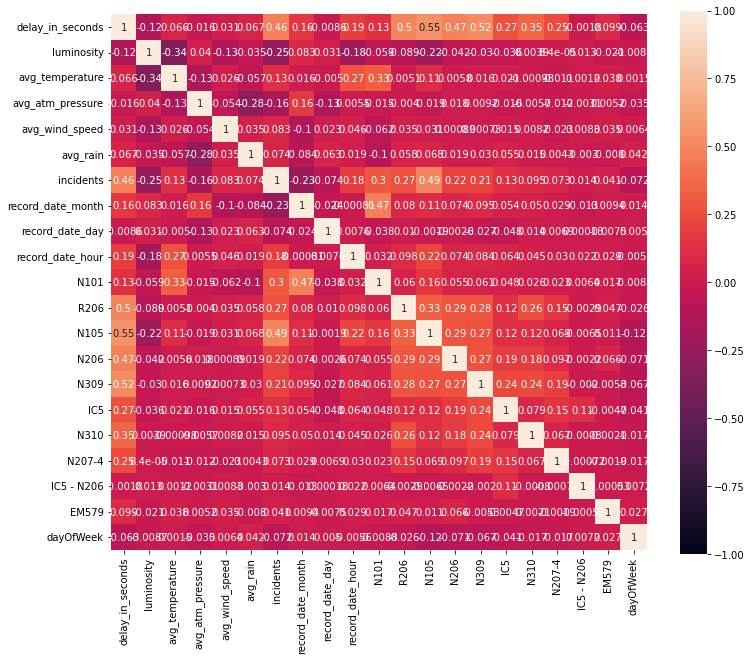

In [65]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square = True, annot=True)
plt.draw()

### 5. Decision Tree Classifier

#### 5.1. Decision Tree Classifier

Imports necessários para a implementação deste modelo

In [66]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree

In [67]:
x = df.drop("incidents", axis = 1)

In [68]:
y = df.incidents

In [69]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

Treino do modelo

In [70]:
clf = DecisionTreeClassifier(random_state=2022)
clf = clf.fit(x_train,y_train)

Visualização da árvore de decisão

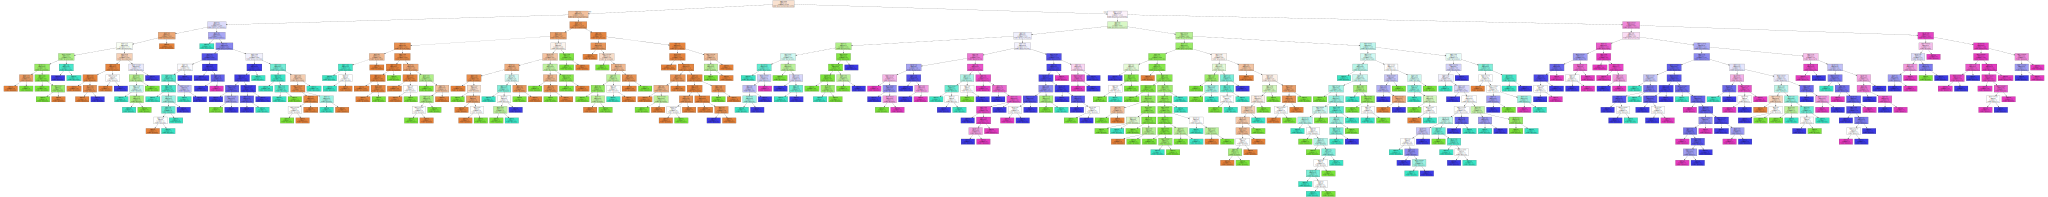

In [71]:
tree.export_graphviz(clf,
                     out_file="tree_dsCompeticao.dot",
                     filled = True)

from graphviz import Source
Source.from_file("tree_dsCompeticao.dot")

Geração de previsões

In [72]:
predictions_train = clf.predict(x_train)
predictions_test = clf.predict(x_test)

Avaliação do modelo

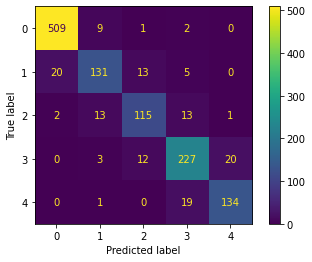

In [73]:
plot_confusion_matrix(clf, x_test, y_test) 

In [81]:
print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       1.00      1.00      1.00       549
           2       1.00      1.00      1.00       434
           3       1.00      1.00      1.00       811
           4       1.00      1.00      1.00       449

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750


Classification report for test data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       521
           1       0.83      0.78      0.80       169
           2       0.82      0.80      0.81       144
           3       0.85      0.87      0.86       262
           4       0.86      0.87      0.87       154

    accuracy                           0.89      1250
   macro avg       0.87      0.86      0.86      1250


##### Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [0.05, 0.1, 0.2]}

model = DecisionTreeClassifier(random_state = 2022)

grid_search = GridSearchCV(model, param_grid, cv=6)

grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

predictions_train = grid_search.predict(x_train)
predictions_test = grid_search.predict(x_test)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 0.05}
Best score:  0.7488000000000001
Classification report for training data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1507
           1       0.80      0.43      0.56       549
           2       0.56      0.49      0.52       434
           3       0.68      0.64      0.66       811
           4       0.62      0.89      0.73       449

    accuracy                           0.75      3750
   macro avg       0.70      0.68      0.68      3750
weighted avg       0.75      0.75      0.74      3750


Classification report for test data
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       521
           1       0.83      0.42      0.56       169
           2       0.56      0.53      0.54       144
           3       0.69      0.66      0.67       262
           4       0.64      0.94      0.76       154

    accuracy   

In [ ]:
#Função genérica que irá ser reutilizada para os proximos modelos
def download_submission_file(model, df_teste, filename):
    predictions_dfT = model.predict(df_teste)
    pd.DataFrame(predictions_dfT)
    
    replace_map = {'Incidents': {"0":'None' ,"1":'Low', "2":'Medium', "3":'High', "4":'Very_High'}}
    
    predictions_dfT = pd.DataFrame(predictions_dfT, columns = ["Incidents"])
    predictions_dfT["Incidents"] = predictions_dfT["Incidents"].astype(str)
    predictions_dfT.replace(replace_map,inplace=True)
    predictions_dfT.index.name = 'RowId'
    predictions_dfT.index+=1
    predictions_dfT.head()
    
    from pathlib import Path
    filepath = Path(filename)
    predictions_dfT.to_csv(filepath, index = True)

In [ ]:
#download_submission_file(clf, df_teste, "submission_files/decisionTree.csv")

#### 5.2 Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [84]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [109]:
#Função que escala os dados e separa-os em dados de treino e em dados de teste
def train_scale_data(dataframe_full, dataframe_target):
    scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(dataframe_full)
    scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(dataframe_target)
    x_scaled = pd.DataFrame(scaler_x.transform(dataframe_full[dataframe_full.columns]), columns=dataframe_full.columns)
    y_scaled = pd.DataFrame(scaler_y.transform(dataframe_target[dataframe_target.columns]), columns=dataframe_target.columns)
    x_train, x_test, y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.25,random_state=2022)
    return x_train, x_test, y_train,y_test,scaler_x,scaler_y

In [110]:
x_train, x_test, y_train,y_test, scaler_x,scaler_y = train_scale_data(x,y)

In [115]:
lr = LogisticRegression(solver='newton-cg', random_state=2022)

In [112]:
#Função que substitui os valores entre 0 e 1 com a respetiva label de "incidents"
def replace_floats_to_incidents(y_train):
    replace_map = {'incidents': {"0.0":'None' ,"0.25":'Low', "0.5":'Medium', "0.75":'High', "1.0":'Very_High'}}
    y_train = pd.DataFrame(y_train, columns = ["incidents"])
    y_train["incidents"] = y_train["incidents"].astype(str)
    y_train.replace(replace_map,inplace=True)
    y_train.index+=1
    return y_train

In [113]:
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

In [116]:
lr.fit(x_train,y_train.values.ravel())

LogisticRegression(random_state=2022, solver='newton-cg')

In [119]:
predictions_test = lr.predict(x_test)
predictions_train = lr.predict(x_train)

In [121]:
print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

        High       0.59      0.69      0.64       811
         Low       0.43      0.14      0.21       549
      Medium       0.56      0.10      0.17       434
        None       0.67      0.94      0.78      1507
   Very_High       0.70      0.67      0.69       449

    accuracy                           0.64      3750
   macro avg       0.59      0.51      0.50      3750
weighted avg       0.61      0.64      0.59      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.57      0.69      0.62       262
         Low       0.38      0.14      0.20       169
      Medium       0.64      0.16      0.26       144
        None       0.72      0.94      0.82       521
   Very_High       0.70      0.71      0.71       154

    accuracy                           0.66      1250
   macro avg       0.60      0.53      0.52      1250


##### Tuning

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver':['newton-cg', 'lbfgs']}

clf = LogisticRegression(random_state = 2022, max_iter=500)
x_train, x_test, y_train,y_test, scaler_x,scaler_y = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

grid_search = GridSearchCV(clf, parameters, cv=5)
grid_search.fit(x_train, y_train.values.ravel())

print("Best parameters found: ", grid_search.best_params_)

predictions_test = grid_search.predict(x_test)
predictions_train = grid_search.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Best parameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification report for training data
              precision    recall  f1-score   support

        High       0.62      0.73      0.67       811
         Low       0.50      0.18      0.27       549
      Medium       0.65      0.17      0.27       434
        None       0.69      0.94      0.80      1507
   Very_High       0.80      0.72      0.76       449

    accuracy                           0.67      3750
   macro avg       0.65      0.55      0.55      3750
weighted avg       0.65      0.67      0.63      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.61      0.75      0.67       262
         Low       0.44      0.18      0.25       169
      Medium       0.68      0.22      0.34       144
        None       0.73      0.95      0.83       521
   Very_High       0.83      0.75      0.78       154

    accuracy                      

In [128]:
#download_submission_file(lr, df_teste, "submission_files/logisticRegression.csv")

#### 5.3 Support Vector Machine

In [130]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [132]:
x_train, x_test, y_train,y_test, scaler_x,scaler_y = train_scale_data(x,y)

In [133]:
from sklearn.svm import SVC
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

In [134]:
model = SVC(random_state=2022)
model.fit(x_train,y_train.values.ravel())

SVC(random_state=2022)

In [137]:
predictions_test = model.predict(x_test)
predictions_train = model.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

        High       0.69      0.69      0.69       811
         Low       0.53      0.19      0.28       549
      Medium       0.83      0.21      0.33       434
        None       0.67      0.97      0.79      1507
   Very_High       0.68      0.73      0.70       449

    accuracy                           0.68      3750
   macro avg       0.68      0.56      0.56      3750
weighted avg       0.68      0.68      0.63      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.67      0.67      0.67       262
         Low       0.46      0.17      0.25       169
      Medium       0.88      0.29      0.44       144
        None       0.71      0.95      0.81       521
   Very_High       0.66      0.75      0.71       154

    accuracy                           0.69      1250
   macro avg       0.67      0.57      0.57      1250


##### Tuning

In [148]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

parameters = {'kernel': ['linear', 'rbf'], 'C': uniform(0, 2), 'gamma': uniform(0, 2)}

svc = SVC(random_state = 2022)
x_train, x_test, y_train,y_test, scaler_x,scaler_y = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

r_search = RandomizedSearchCV(svc, param_distributions=parameters, n_iter=12, cv=5)
r_search.fit(x_train, y_train.values.ravel())

print("Best parameters found: ", r_search.best_params_)

predictions_test = r_search.predict(x_test)
predictions_train = r_search.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Best parameters found:  {'C': 1.0573592058745245, 'gamma': 0.8806407895991659, 'kernel': 'rbf'}
Classification report for training data
              precision    recall  f1-score   support

        High       0.72      0.73      0.72       811
         Low       0.59      0.24      0.34       549
      Medium       0.84      0.25      0.39       434
        None       0.70      0.98      0.81      1507
   Very_High       0.73      0.73      0.73       449

    accuracy                           0.70      3750
   macro avg       0.71      0.59      0.60      3750
weighted avg       0.71      0.70      0.67      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.69      0.71      0.70       262
         Low       0.45      0.20      0.28       169
      Medium       0.92      0.33      0.48       144
        None       0.73      0.96      0.83       521
   Very_High       0.71      0.75      0.73       154

    accuracy

In [ ]:
#download_submission_file(model, df_teste, "submission_files/svm.csv")

#### 5.4 Redes neuronais

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import optimizers
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from livelossplot import PlotLossesKerasTF

In [ ]:
x = df.drop('incidents',axis=1)
y = df[['incidents']]

In [ ]:
x.info()

In [ ]:
x_train, x_test, y_train,y_test,scaler_x,scaler_y = train_scale_data(x,y)

In [ ]:
def build_model(activation = "relu", learning_rate = 0.01):
    Create a sequential model (with three layers - last one is the output)
    model = Sequential()
    model.add(Dense(16, input_dim = 20, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation))
    
    Compile the model
    Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss = "mae",
        optimizer = optimizers.Adam(learning_rate),
        metrics = ["mae", "mse"])
    return model

In [ ]:
model = build_model()
model.summary()

In [ ]:
TUNING_DICT = {
    "activation" :    ["relu", "sigmoid"],
    "learning_rate" : [0.01, 0.02, 0.03]
}

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [ ]:
TODO: Corrigir isto
kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

model = KerasRegressor(build_fn = build_model, epochs = 300, batch_size = 100)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = "neg_mean_absolute_error",
                           refit = "True",
                           verbose = 1)

grid_search.fit(x_train, y_train, validation_split = 0.2,callbacks=[PlotLossesKerasTF()]) 

In [ ]:
summarize results
print("Best: %f using %s" %(grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))

In [ ]:
Our best model (remember we set refit=True?)
best_mlp_model = grid_search.best_estimator_

In [ ]:
from livelossplot import PlotLossesKerasTF

In [ ]:
best_mlp_model.fit(x_train, y_train, epochs = 100,
                   validation_data = (x_test, y_test),
                   callbacks = [PlotLossesKerasTF()], verbose = 1)

In [ ]:
Obtain predictions
predictions = best_mlp_model.predict(x_test)
predictions = predictions.reshape(predictions.shape[0], 1)
predictions[:5]

In [ ]:
And now let's unscale the model's predictions to see real prices!
predictions_unscaled = scaler_y.inverse_transform(y_test)
predictions_unscaled[:5]

In [ ]:
Let's unscale y_test to get the original values
y_test_unscaled = scaler_y.inverse_transform(predictions)
y_test_unscaled[:5]

In [ ]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
y_test_teste = replace_floats_to_incidents(y_test)

In [ ]:
y_test_unscaled

In [ ]:
print(classification_report(y_test_teste,predictions))

In [ ]:
#download_submission_file(best_mlp_model, df_teste, "submission_files/redeNeuronal.csv")

#### 5.5 K-Means

In [159]:
from sklearn.cluster import KMeans

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2022)

myKMC = KMeans(n_clusters = 5, random_state = 2022)

myKMC.fit(x_train)

predictions_train = myKMC.predict(x_train)
predictions_test = myKMC.predict(x_test)

print("Classification report for training data")
print(classification_report(y_train, predictions_train, zero_division=1))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test, zero_division=1))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1609
           1       0.00      0.00      0.00       581
           2       0.09      0.07      0.08       463
           3       0.00      0.00      0.00       860
           4       0.97      0.25      0.40       487

    accuracy                           0.44      4000
   macro avg       0.30      0.26      0.22      4000
weighted avg       0.31      0.44      0.31      4000


Classification report for test data
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       419
           1       0.00      0.00      0.00       137
           2       0.08      0.07      0.08       115
           3       1.00      0.00      0.00       213
           4       1.00      0.25      0.40       116

    accuracy                           0.46      1000
   macro avg       0.51      0.26      0.23      1000


In [ ]:
#download_submission_file(myKMC, df_teste, "submission_files/kmeans.csv")

#### 5.6 K-Medoids

In [164]:
from sklearn_extra.cluster import KMedoids

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2022)

myKMC = KMedoids(n_clusters = 5, random_state = 2022)

myKMC.fit(x_train)

predictions_train = myKMC.predict(x_train)
predictions_test = myKMC.predict(x_test)

print("Classification report for training data")
print(classification_report(y_train, predictions_train, zero_division=1))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test, zero_division=1))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

           0       0.46      0.44      0.45      1609
           1       0.14      0.19      0.16       581
           2       0.12      0.11      0.12       463
           3       0.02      0.00      0.01       860
           4       0.03      0.07      0.04       487

    accuracy                           0.23      4000
   macro avg       0.15      0.16      0.15      4000
weighted avg       0.23      0.23      0.22      4000


Classification report for test data
              precision    recall  f1-score   support

           0       0.46      0.40      0.43       419
           1       0.15      0.23      0.18       137
           2       0.09      0.09      0.09       115
           3       0.00      0.00      0.00       213
           4       0.02      0.04      0.02       116

    accuracy                           0.21      1000
   macro avg       0.14      0.15      0.14      1000


In [ ]:
#download_submission_file(myKMC, df_teste, "submission_files/kmedoids.csv")

NOTA: Tanto para os algoritmos de clustering k-means e k-medoids, este problema em questão não vai funcionar muito bem porque existem imensas features (20) e este tipo de algoritmo não lida bem com datasets de várias features.

#### 5.7 Ensemble learning

##### 5.7.1 Voting

In [265]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]
x_train, x_test, y_train,y_test, scaler_x,scaler_y = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

SVM = SVC(random_state=2022, kernel='linear', probability=True)
xg_reg = xgb.XGBClassifier(objective ='reg:linear', use_label_encoder=False, colsample_bytree = 0.3, eval_metric='mlogloss',
                           learning_rate = 0.75, max_depth = 5, alpha = 10, n_estimators = 100)

rfc = RandomForestClassifier(n_estimators=200, random_state=2022,bootstrap=True,oob_score=True,n_jobs=-1,verbose=0)

clf = DecisionTreeClassifier(random_state=2022, max_depth=5, min_samples_leaf=0.05)

lr = LogisticRegression(C=10, penalty='l2', solver ='newton-cg', random_state=2022, max_iter=500) 

estimators = [('svm', SVM), ('xgb', xg_reg), ('rfc', rfc),('clf',clf),('lr',lr)]
ve = VotingClassifier(estimators, voting = 'hard', weights = [0.7, 0.9, 1, 0.8 ,0.65],)

ve = ve.fit(x_train, y_train.values.ravel())

In [266]:
predictions_test = ve.predict(x_test)
predictions_train = ve.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

Classification report for training data
              precision    recall  f1-score   support

        High       0.83      0.87      0.85       811
         Low       0.89      0.68      0.77       549
      Medium       0.91      0.58      0.71       434
        None       0.87      0.99      0.92      1507
   Very_High       0.86      0.92      0.89       449

    accuracy                           0.86      3750
   macro avg       0.87      0.81      0.83      3750
weighted avg       0.87      0.86      0.86      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.79      0.86      0.83       262
         Low       0.81      0.67      0.73       169
      Medium       0.86      0.51      0.64       144
        None       0.89      0.99      0.94       521
   Very_High       0.86      0.90      0.88       154

    accuracy                           0.85      1250
   macro avg       0.84      0.79      0.80      1250


In [ ]:
#download_submission_file(ve, df_teste, "submission_files/voting.csv")

##### 5.7.2 Bagging

In [262]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

x = df.drop(['incidents'], axis=1)
y = df['incidents']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

n_estimators = [10,40,68, 80, 100, 160]

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=2022)
parameters={'n_estimators' :n_estimators}

gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=2022, max_depth=5, min_samples_leaf=0.05), 
                                    bootstrap = True),
                  param_grid=parameters, cv=cv, refit = True, verbose = 3,n_jobs=-1)
gs = gs.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [263]:
predictions_test = gs.predict(x_test)
predictions_train = gs.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1507
           1       0.63      0.56      0.59       549
           2       0.54      0.48      0.50       434
           3       0.64      0.59      0.62       811
           4       0.70      0.74      0.72       449

    accuracy                           0.73      3750
   macro avg       0.67      0.66      0.67      3750
weighted avg       0.72      0.73      0.73      3750


Classification report for test data
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       521
           1       0.65      0.58      0.61       169
           2       0.61      0.52      0.56       144
           3       0.68      0.65      0.66       262
           4       0.71      0.79      0.75       154

    accuracy                           0.77      1250
   macro avg       0.71      0.70      0.70      1250


In [ ]:
#download_submission_file(gs, df_teste, "submission_files/bagging.csv")

##### 5.7.3 Stacking

In [269]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb

In [280]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

x_train, x_test, y_train,y_test,sx,sy = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

forest = RandomForestClassifier(n_estimators=200, random_state=2022,bootstrap=True,oob_score=True,n_jobs=-1,verbose=0)
lr = LogisticRegression(C=10, penalty='l2', solver ='newton-cg', random_state=2022, max_iter=500) 
clf = DecisionTreeClassifier(random_state=2022, max_depth=5, min_samples_leaf=0.05)
xg_reg = xgb.XGBClassifier(objective ='reg:linear', use_label_encoder=False, colsample_bytree = 0.3, eval_metric='mlogloss',
                           learning_rate = 0.75, max_depth = 5, alpha = 10, n_estimators = 100)

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=2022)
estimators = [
     ('rf', forest),
     ('xg_reg', xg_reg),
     ('lr',lr),
     ('clf',clf)
]

sclf = StackingClassifier(estimators=estimators,
                          final_estimator=xg_reg,
                          cv=5,passthrough=True,n_jobs=-1)

sclf.fit(x_train, y_train.values.ravel())


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=2022)),
                               ('xg_reg',
                                XGBClassifier(alpha=10, base_score=None,
                                              booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.3,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              gamma=None, gpu_id=None,
                                              importance

In [281]:
predictions_test = sclf.predict(x_test)
predictions_train = sclf.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

        High       0.97      0.98      0.98       811
         Low       0.98      0.97      0.97       549
      Medium       0.99      0.96      0.97       434
        None       0.99      1.00      0.99      1507
   Very_High       0.97      0.99      0.98       449

    accuracy                           0.98      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.98      0.98      0.98      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.86      0.92      0.89       262
         Low       0.92      0.84      0.88       169
      Medium       0.87      0.81      0.83       144
        None       0.97      0.99      0.98       521
   Very_High       0.91      0.90      0.90       154

    accuracy                           0.92      1250
   macro avg       0.91      0.89      0.90      1250


In [ ]:
#download_submission_file(sclf, df_teste, "submission_files/stacking.csv")

##### 5.7.4 AdaBoost

In [282]:
from sklearn.ensemble import AdaBoostClassifier

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

In [283]:
parameters = {'n_estimators': [10,50,100,200], 
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.01,0.1,1]
             }

clf = GridSearchCV(estimator=AdaBoostClassifier(random_state=2022), param_grid=parameters, cv=5)
clf.fit(x_train, y_train.values.ravel())

In [284]:
predictions_test = clf.predict(x_test)
predictions_train = clf.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Classification report for training data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1507
           1       0.73      0.75      0.74       549
           2       0.77      0.45      0.56       434
           3       0.65      0.87      0.75       811
           4       0.90      0.53      0.67       449

    accuracy                           0.79      3750
   macro avg       0.79      0.71      0.73      3750
weighted avg       0.80      0.79      0.78      3750


Classification report for test data
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       521
           1       0.72      0.74      0.73       169
           2       0.74      0.47      0.57       144
           3       0.68      0.88      0.77       262
           4       0.90      0.65      0.75       154

    accuracy                           0.81      1250
   macro avg       0.79      0.74      0.75      1250


In [ ]:
##download_submission_file(xg_reg, df_teste, "submission_files/adaboost.csv")

##### 5.7.5 XGBoost

In [285]:
import xgboost as xgb

In [331]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=2022)

In [332]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', use_label_encoder=False, random_state=2022, colsample_bytree = 0.8, eval_metric='mlogloss',
                           learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 100)


xg_reg.fit(x_train, y_train.values.ravel())

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=2022,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False, ...)

In [334]:
predictions_test = xg_reg.predict(x_test)
predictions_train = xg_reg.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

Classification report for training data
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1206
           1       0.80      0.81      0.80       432
           2       0.92      0.69      0.79       345
           3       0.90      0.92      0.91       642
           4       0.92      0.95      0.94       375

    accuracy                           0.91      3000
   macro avg       0.90      0.87      0.88      3000
weighted avg       0.91      0.91      0.90      3000


Classification report for test data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       822
           1       0.78      0.77      0.78       286
           2       0.88      0.61      0.72       233
           3       0.84      0.89      0.86       431
           4       0.88      0.90      0.89       228

    accuracy                           0.88      2000
   macro avg       0.86      0.83      0.84      2000


In [ ]:
#download_submission_file(xg_reg, df_teste, "submission_files/xgboost.csv")

##### 5.7.6 Random Forest Classifier

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [336]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [337]:
x_train, x_test, y_train, y_test,sx,sy = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)
y_test = replace_floats_to_incidents(y_test)

In [338]:
rfc = RandomForestClassifier(n_estimators=200, random_state=2022,bootstrap=True,oob_score=True,n_jobs=-1,verbose=0,criterion='entropy')
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=2022)

In [341]:
predictions_test = rfc.predict(x_test)
predictions_train = rfc.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

Classification report for training data
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       811
         Low       1.00      1.00      1.00       549
      Medium       1.00      1.00      1.00       434
        None       1.00      1.00      1.00      1507
   Very_High       1.00      1.00      1.00       449

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.88      0.90      0.89       262
         Low       0.83      0.86      0.85       169
      Medium       0.91      0.74      0.82       144
        None       0.97      0.99      0.98       521
   Very_High       0.90      0.92      0.91       154

    accuracy                           0.92      1250
   macro avg       0.90      0.88      0.89      1250


###### Tuning

In [344]:
from scipy.stats import randint

param_dist = {"n_estimators": randint(10, 100),
              "max_depth": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

rs = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=2022)

# Fit the randomized search object to the data
rs.fit(x_train, y_train.values.ravel())

print("Best parameters found: ", rs.best_params_)

predictions_test = rs.predict(x_test)
predictions_train = rs.predict(x_train)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitting")
else:
    print("Model is not overfitting")

C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\skl

Best parameters found:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'n_estimators': 66}
Classification report for training data
              precision    recall  f1-score   support

        High       0.75      0.77      0.76       811
         Low       0.65      0.71      0.68       549
      Medium       0.98      0.28      0.43       434
        None       0.88      0.96      0.92      1507
   Very_High       0.78      0.96      0.86       449

    accuracy                           0.80      3750
   macro avg       0.81      0.74      0.73      3750
weighted avg       0.82      0.80      0.79      3750


Classification report for test data
              precision    recall  f1-score   support

        High       0.73      0.78      0.76       262
         Low       0.66      0.70      0.68       169
      Medium       0.96      0.31      0.47       144
        None       0.90      0.97      0.93       521
   Very_High       0.77      0.92      0.84       154



In [ ]:
#download_submission_file(rfc, df_teste, "submission_files/randomForestClassifier.csv")